In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
df1=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df2=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
df = pd.concat([df1, df2], axis=0)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [6]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [7]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical columns with the median
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())


In [8]:
# df.Dependents=df.Dependents.fillna(df.Dependents.mode()[0])
rpl={'0':'0','1':'1','2':'2','3+':'3'}
df.Dependents=df.Dependents.replace(rpl).astype(int)

In [9]:
# df.Credit_History=df.Credit_History.fillna(df.Credit_History.mode()[0])
# df.Self_Employed=df.Self_Employed.fillna(df.Self_Employed.mode())
# df.Married=df.Married.fillna(df.Married.mode())
# df.Gender = df.Gender.fillna(df.Gender.mode()[0])
# df.Loan_Status=df.Loan_Status.fillna(df.Loan_Status.mode()[0])
#df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean()).astype(int)

In [10]:
le = LabelEncoder()
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Married'] = le.fit_transform(df['Married'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Education']=le.fit_transform(df['Education'])


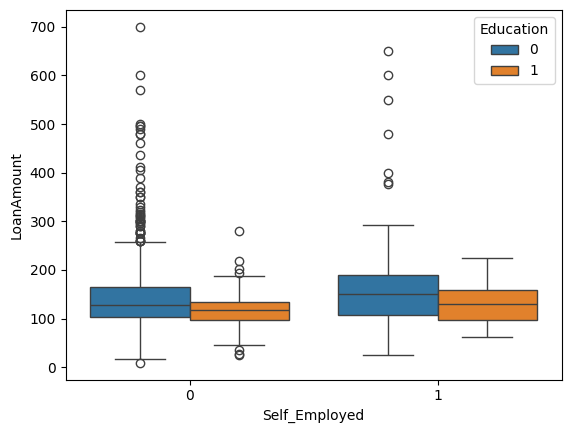

In [11]:
df = df.reset_index(drop=True)

sns.boxplot(x='Self_Employed', y='LoanAmount', hue='Education', data=df)
plt.show()

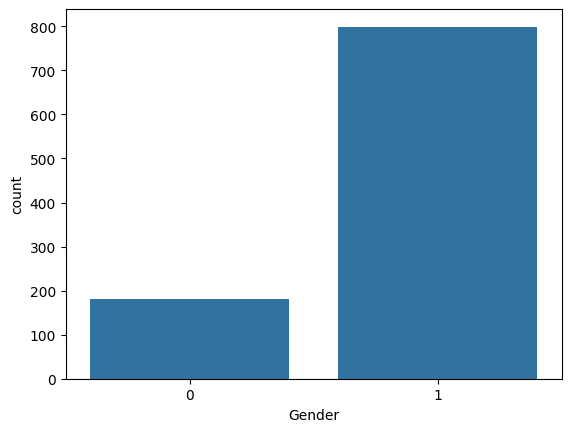

In [12]:
df = df.reset_index(drop=True)

sns.countplot(x='Gender', data=df)
plt.show()

<Axes: xlabel='Education', ylabel='count'>

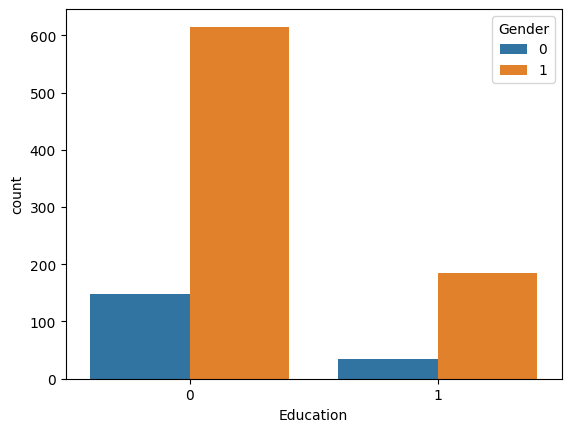

In [13]:
sns.countplot(x='Education',hue="Gender",data=df)

<Axes: ylabel='ApplicantIncome'>

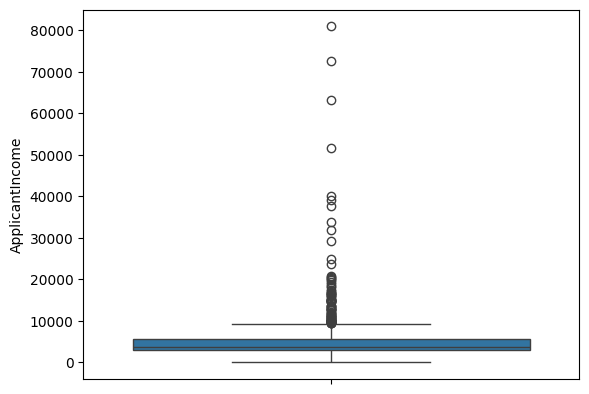

In [14]:
sns.boxplot(df["ApplicantIncome"])

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int32  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int32  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 76.8+ KB


In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df = df.drop('Loan_ID', axis=1)


In [19]:
df.shape

(981, 12)

In [20]:
X=df.drop("Loan_Status",axis=1)
y=df['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
print(X_train.shape, X_test.shape)

(686, 11) (295, 11)


In [22]:
print(y_train.shape, y_test.shape)

(686,) (295,)


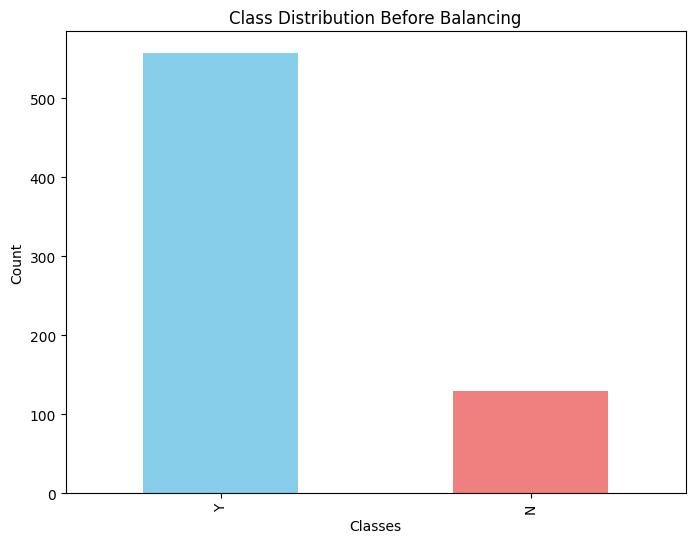

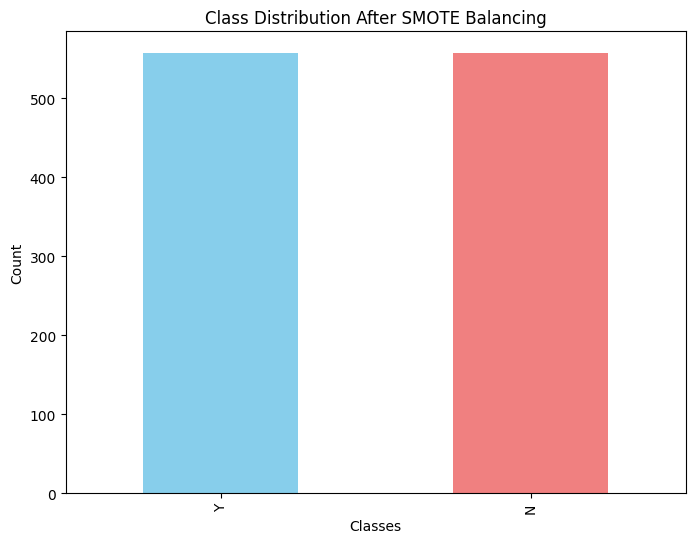

In [23]:
# Plot the class distribution before balancing
plt.figure(figsize=(8,6))
y_train.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution Before Balancing')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# Apply SMOTE or other balancing techniques (if any)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plot the class distribution after balancing
plt.figure(figsize=(8,6))
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution After SMOTE Balancing')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}

Test Accuracy: 80.34%

Classification Report:
              precision    recall  f1-score   support

           N       0.50      0.09      0.15        58
           Y       0.81      0.98      0.89       237

    accuracy                           0.80       295
   macro avg       0.66      0.53      0.52       295
weighted avg       0.75      0.80      0.74       295

ROC AUC Score: 0.79
[learning_curve] Training set sizes: [ 54 109 164 219 274 328 383 438 493 548]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


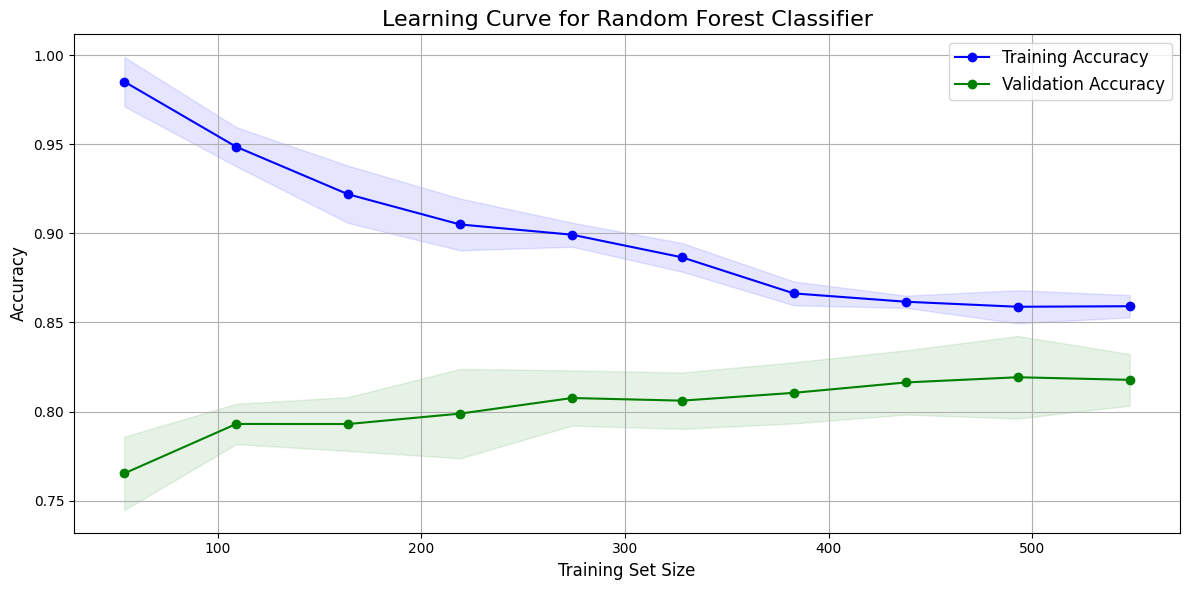

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

# Step 1: Split the dataset (Stratified to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train,y_train)

# Step 3: Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None],  # Automatically handle imbalance
}

# Step 4: RandomizedSearchCV for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    model_rf, param_distributions=param_dist, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=cv, random_state=42, verbose=1
)
random_search.fit(X_train, y_train)

# Best model and parameters
best_model_rf = random_search.best_estimator_
print("\nBest Hyperparameters:")
print(random_search.best_params_)

# Step 5: Evaluate the model on test data
y_pred = best_model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred) * 100
print(f"\nTest Accuracy: {acc_rf:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)


# ROC-AUC Score (for binary classification)
if len(np.unique(y)) == 2 and hasattr(best_model_rf, "predict_proba"):
    roc_auc = roc_auc_score(y_test, best_model_rf.predict_proba(X_test)[:, 1])
    print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 6: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model_rf,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=1
)

# Calculate mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green', marker='o')

# Add shaded areas to show standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title("Learning Curve for Random Forest Classifier", fontsize=16)
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 83.39%

Classification Report:
              precision    recall  f1-score   support

           N       0.62      0.41      0.49        58
           Y       0.87      0.94      0.90       237

    accuracy                           0.83       295
   macro avg       0.74      0.68      0.70       295
weighted avg       0.82      0.83      0.82       295

ROC AUC: 0.71
[learning_curve] Training set sizes: [ 54 109 164 219 274 328 383 438 493 548]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


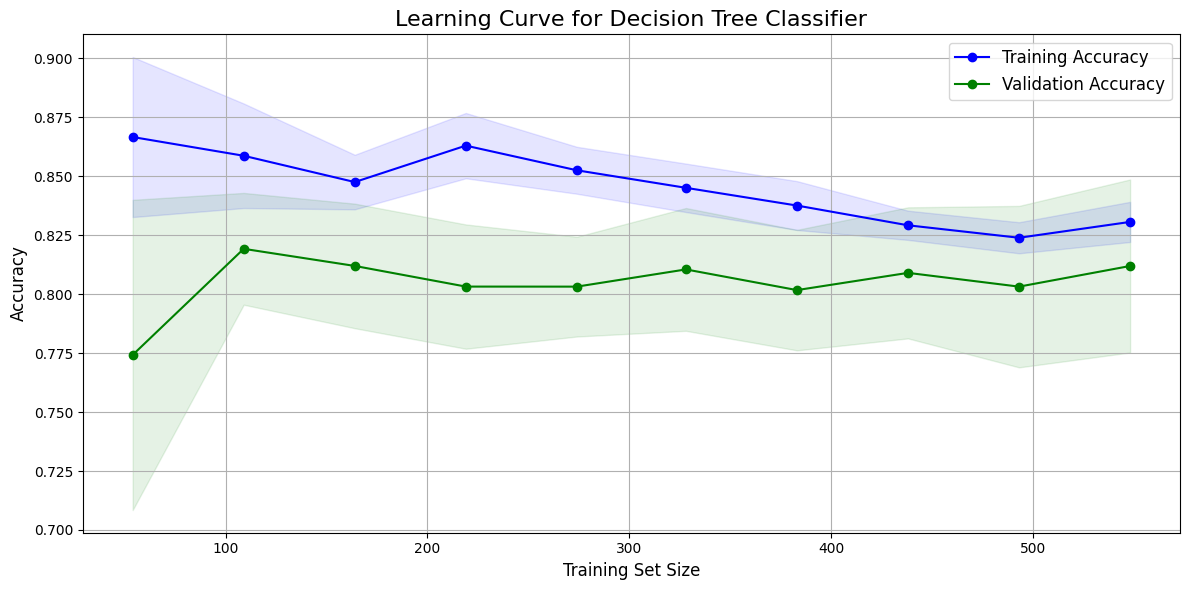

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Step 1: Split data into training and test sets (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Define base Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train,y_train)
# Step 3: Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

# Step 4: Use GridSearchCV for hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Step 5: Get the best model and parameters
best_model_dt = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 6: Evaluate the best model on test data
y_pred = best_model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {acc_dt:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC (if applicable)
if hasattr(best_model_dt, "predict_proba"):  # Check for predict_proba support
    roc_auc = roc_auc_score(y_test, best_model_dt.predict_proba(X_test)[:, 1])
    print(f"ROC AUC: {roc_auc:.2f}")

# Step 7: Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model_dt,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=1
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='o', label='Validation Accuracy')

# Add shaded areas to show standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve for Decision Tree Classifier', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy of the best model: 82.74%


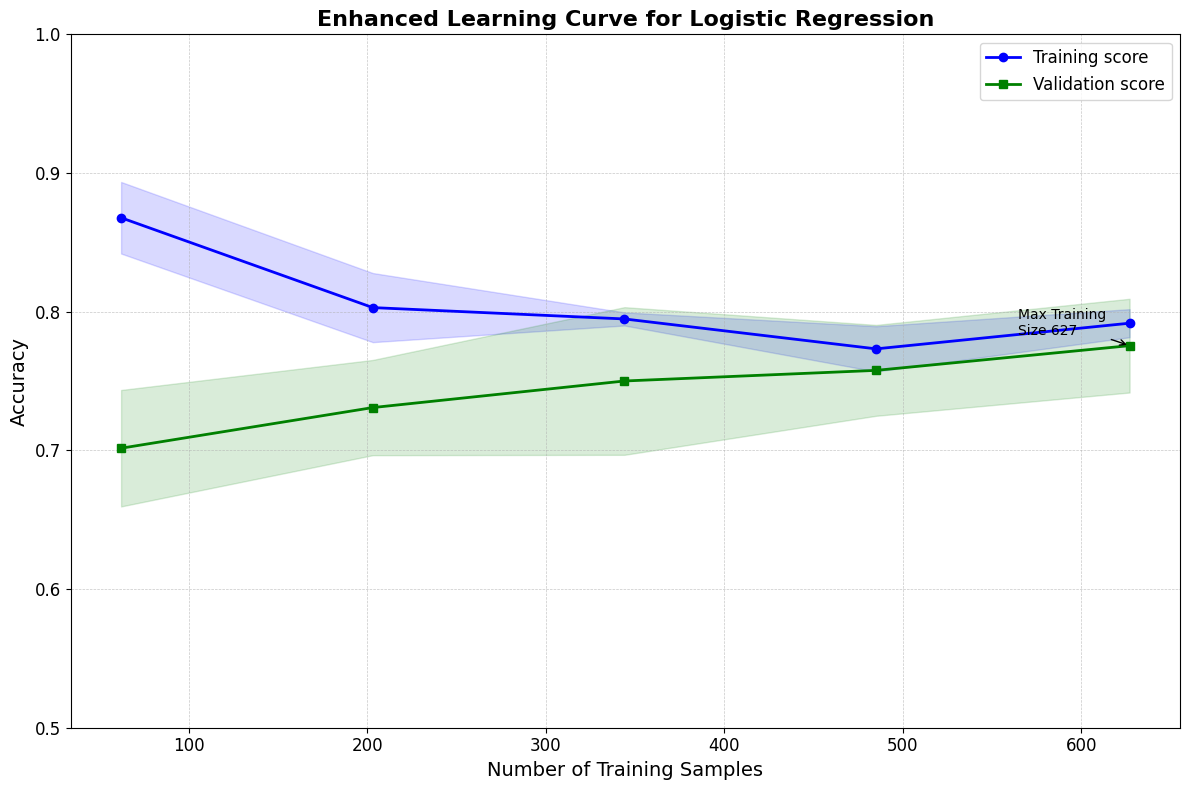

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Example data splitting (replace X, y with your dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 1: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize Logistic Regression
model_LR = LogisticRegression(random_state=42, max_iter=100, solver='liblinear', class_weight='balanced')
model_LR.fit(X_train,y_train)
# Step 3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers to try
    'max_iter': [100, 200],  # Number of iterations
    'tol': [1e-4, 1e-3],  # Tolerance for convergence
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model_LR, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model and its accuracy
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy of the best model: {acc_lr:.2f}%")

# Step 4: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation for plotting
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Enhanced Learning Curve Visualization
plt.figure(figsize=(12, 8))

# Plot mean training and validation scores
plt.plot(train_sizes, train_mean, 'o-', label='Training score', color='blue', linewidth=2, markersize=6)
plt.plot(train_sizes, test_mean, 's-', label='Validation score', color='green', linewidth=2, markersize=6)

# Fill standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

# Annotations for key points
plt.annotate(f'Max Training\nSize {train_sizes[-1]}', 
             xy=(train_sizes[-1], test_mean[-1]), 
             xytext=(train_sizes[-1]*0.9, test_mean[-1]*1.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Adding labels, title, and legend
plt.title("Enhanced Learning Curve for Logistic Regression", fontsize=16, fontweight='bold')
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Dynamically adjust y-axis range for better visualization
plt.ylim(0.5, 1.0)

# Show the plot
plt.tight_layout()
plt.show()


In [27]:
# Example input data for a single sample (replace with actual feature values)
single_sample = np.array([1,1,1,0,0,3717,2925.0,151.0,360.0,1.0,1])

# Scale the sample using the same scaler
single_sample_scaled = scaler.transform(single_sample.reshape(1, -1))

# Predict class label
predicted_class = best_model.predict(single_sample_scaled)
print(f"Predicted Class: {predicted_class[0]}")

# Predict probability for each class
predicted_probabilities = best_model.predict_proba(single_sample_scaled)
print(f"Predicted Probabilities: {predicted_probabilities}")


Predicted Class: Y
Predicted Probabilities: [[0.39083236 0.60916764]]


C:\Users\daksh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


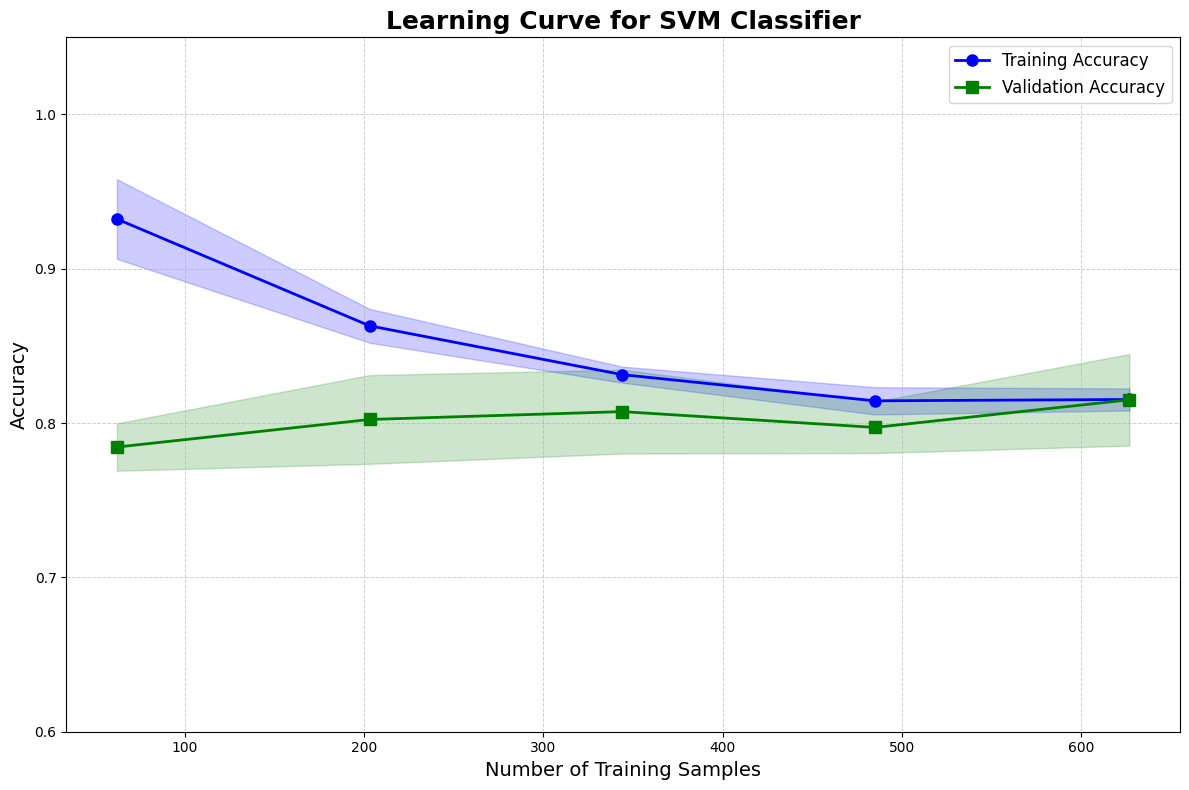

82.74111675126903

In [28]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# Example data and preprocessing (replace X_train, y_train with your data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train,y_train)
# Learning Curve computation
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation for plotting
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Enhanced Learning Curve Visualization
plt.figure(figsize=(12, 8))

# Plot mean training and validation scores with different markers
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy', color='blue', linewidth=2, markersize=8)
plt.plot(train_sizes, test_mean, 's-', label='Validation Accuracy', color='green', linewidth=2, markersize=8)

# Fill the area between the curves with transparency to show standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Adding titles and labels with larger fonts
plt.title("Learning Curve for SVM Classifier", fontsize=18, fontweight='bold')
plt.xlabel("Number of Training Samples", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Add grid and legend with better visibility
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend(fontsize=12)

# Set the range of y-axis for better visualization of accuracy
plt.ylim(0.6, 1.05)

# Show the plot
plt.tight_layout()
plt.show()
acc_svm=accuracy_score(y_test, y_pred) * 100
acc_svm


In [29]:
models=pd.DataFrame({
    'Model':['Random Forest','Logistic Regression','SVM','Decision Tree'],
    'Score':[acc_rf,acc_lr,acc_svm,acc_dt]
    })
models.sort_values(by='Score',ascending=True)

,Model,Score
0,Random Forest,80.338983
1,Logistic Regression,82.741117
2,SVM,82.741117
3,Decision Tree,83.389831


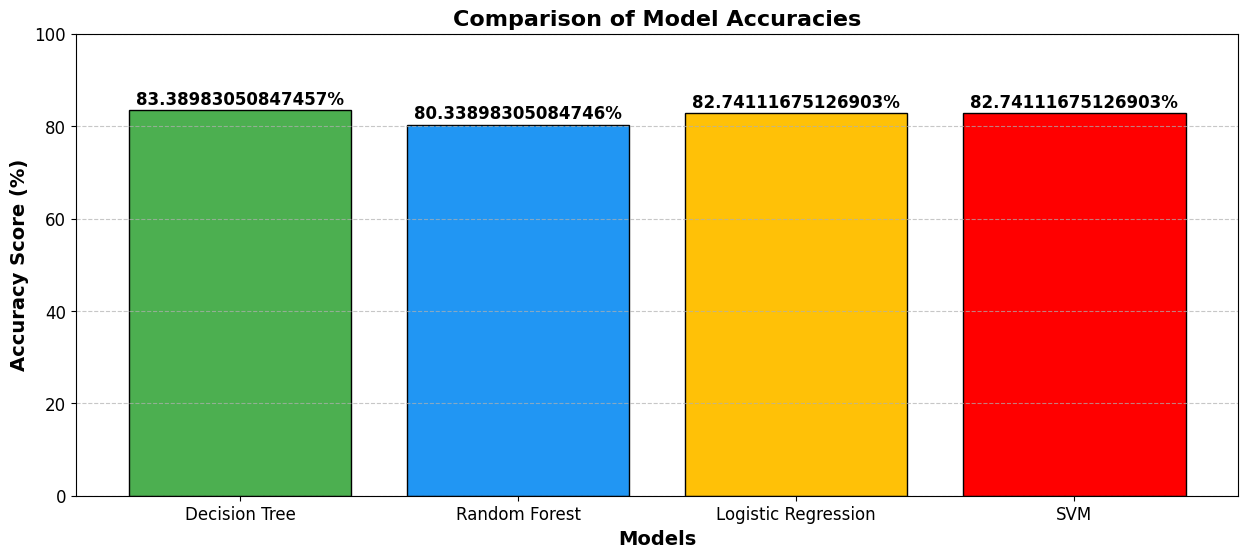

In [30]:
accuracy = [acc_dt, acc_rf, acc_lr,acc_svm]
models = ['Decision Tree', 'Random Forest', 'Logistic Regression','SVM']
# scores=[scores_dt.mean,scores_rf.mean,scores_lr.mean]
colors = ['#4CAF50', '#2196F3', '#FFC107','#FF0000']
plt.figure(figsize=(15, 6))
bars = plt.bar(models, accuracy, color=colors, edgecolor='black')

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracy):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{acc}%", ha='center', va='bottom', fontsize=12, fontweight='bold')


plt.xlabel("Models", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy Score (%)", fontsize=14, fontweight='bold')
plt.title("Comparison of Model Accuracies", fontsize=16, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [31]:
import pickle
filename="savedmodel.pkl"
pickle.dump(svm_model,open(filename,'wb'))

In [32]:
load_model=pickle.load(open(filename,'rb'))

In [33]:
y_train.head()

393    Y
712    Y
573    N
405    Y
627    Y
Name: Loan_Status, dtype: object

In [34]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
393,1,1,2,1,0,1993,1625.0,113.0,180.0,1.0,1
712,1,1,3,0,0,9719,0.0,61.0,360.0,1.0,2
573,1,1,2,1,0,6125,1625.0,187.0,480.0,1.0,1
405,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1
627,1,1,2,0,0,12173,0.0,166.0,360.0,0.0,1


In [35]:
inf=load_model.predict([[1,1,1,0,0,3717,2925.0,151.0,360.0,1.0,1]])#[N]
inf

C:\Users\daksh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Y'], dtype=object)

In [36]:
inf=load_model.predict([[1,1,2,1,0,1993,1625.0,113.0,180.0,1.0,1]])#[Y]
inf

C:\Users\daksh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Y'], dtype=object)

In [37]:
inf=load_model.predict([[1,1,2,1,0,6125,1625.0,187.0,480.0,1.0,1]])#[N]
inf

C:\Users\daksh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Y'], dtype=object)